In [169]:
#Загрузка основных библиотек

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import datetime as dt

import missingno as msno 

In [170]:
#Импорт таблиц Transactions и Aggregates
transactions = pd.read_csv('../input/bank-stat/transactions.csv')
print(transactions.shape)
transactions.head()

(751747, 8)


,client_id,last_day_month,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,1322,2019-12-31,TRANSPORTATION,90.00,3,23.00,44.0,30.000000
1,7737,2019-05-31,RETAIL STORES,989.00,5,99.00,423.0,197.800000
2,9549,2020-03-31,NON FOOD RETAIL,11878.55,24,52.79,2303.0,494.939583
3,4562,2019-12-31,FINANCIAL SERVICES,15000.00,1,15000.00,15000.0,15000.000000
4,7112,2020-02-29,BUSINESS SERVICES,887.60,3,107.10,413.7,295.866666


In [171]:
aggregates = pd.read_csv('../input/bank-stat/aggregates.csv')
print(aggregates.shape)
aggregates.head()

(177963, 220)


,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,4268,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8951,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3485,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8008,2019-11-01 00:00:00,2.0,6.0,12.0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1615,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Анализ имеющихся данных. Процент пропущенных значений

In [172]:
aggregates.isna().sum().sum()/(aggregates.shape[0]*aggregates.shape[1])

0.561718115052516

In [173]:
#msno.matrix(aggregates) 

В таблице Aggregates gриведены данные выгрузок по месяцам за последние 22 месяца. Считаем актуальными данные на послединий месяц, а именно 01-10-2020. Выберем только их из таблица Aggregates.

In [174]:
agg_actual = aggregates[(aggregates["report_date"] == '2020-10-01') 
                            | (aggregates["report_date"] == '2020-10-01 00:00:00')]
agg_actual.head()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
19147,101,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,0.0,1.0,1.0,9999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19148,3862,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19149,9131,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,1.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19150,3979,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19151,3604,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Найдем процент пропущенных значений.

In [175]:
agg_actual.isna().sum().sum()/(agg_actual.shape[0]*agg_actual.shape[1])

0.5246857599647169

In [176]:
#msno.matrix(agg_actual)

Проанализируем траты пользователей за последний месяц. Т.е. выберем все транзакции по выписке за 30-09-2020

In [177]:
transactions['date1'] = transactions['last_day_month'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
transactions['day'] = transactions.date1.dt.day
transactions['month'] = transactions.date1.dt.month
transactions['year'] = transactions.date1.dt.year

tr_last_month = transactions[(transactions["month"] == 9) & (transactions["year"] == 2020)]
tr_last_month = tr_last_month.drop(['last_day_month','date1','day','month','year'],axis = 1)
print(tr_last_month.shape)
tr_last_month.head()

(35577, 7)


,client_id,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
25,3673,FINANCIAL SERVICES,29726.9,7,410.0,13156.9,4246.700000
28,4309,ENTERTAINMENT,1600.0,3,100.0,1100.0,533.333333
45,4700,AUTO,500.0,1,500.0,500.0,500.000000
46,8045,TRANSPORTATION,44.0,2,22.0,22.0,22.000000
48,9201,BUSINESS SERVICES,256.0,1,256.0,256.0,256.000000


Будем считать, что при оценке активности пользователя нам не важны категории платежей, а только общая сумма затрат. Тогда суммируем данные по пользователям.

In [178]:
tr_last_month = tr_last_month.groupby(by = ['client_id'],as_index=False).sum()
print(tr_last_month.shape)
tr_last_month.head()

(8460, 6)


,client_id,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,0,87027.00,80,5840.00,26585.00,10177.170144
1,2,6787.80,7,259.00,3392.00,1180.466666
2,4,57782.25,32,7781.98,26412.45,15763.282708
3,5,61302.56,70,889.95,31986.95,5714.839808
4,6,11000.00,1,11000.00,11000.00,11000.000000


Совместим две таблицы, используя сlient_id как ключ.

In [179]:
trans=pd.merge(agg_actual.client_id, tr_last_month, on=['client_id'], how='left')
trans=trans.fillna(0)
mergedStuff = pd.merge(agg_actual, trans, on=['client_id'], how='inner')
mergedStuff.head()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,0.0,1.0,1.0,9999.0,...,0.0,0.0,0.0,0.0,0.0,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000000
2,9131,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,1.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,48000.00,6.0,100.00,13000.00,8000.000000
3,3979,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000000
4,3604,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,90081.89,11.0,242.89,50147.89,9077.390000


Начнем очистку данных. Удалим все столбцы в которых процент пропущенных значений более 15%.

In [180]:
agg_15 = mergedStuff[mergedStuff.columns[mergedStuff.isnull().mean() < 0.15]]
print(agg_15.shape)
agg_15.head()

(9894, 23)


,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,2.0,2.0,0.0,4.226,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,1.0,1.0,0.0,67.387,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,9131,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,3.0,1.0,0.0,58.258,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
3,3979,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,41.355,...,0.0,1.0,0.0,1.0,31.239247,0.00,0.0,0.00,0.00,0.000000
4,3604,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,2.0,1.0,0.0,2.161,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000


Рассмотрим процент пропусков по каждой колонке.

In [181]:
ar = []
for col in agg_15.columns:
     print(col,agg_15[col].isna().sum()/agg_15.shape[0])

client_id 0.0
report_date 0.0
cnt_zp_1m 0.13129169193450577
cnt_zp_3m 0.13129169193450577
cnt_zp_6m 0.13129169193450577
cnt_zp_12m 0.13129169193450577
total_num_cards 0.002021427127552052
cnt_active 0.002021427127552052
cnt_cur 0.002021427127552052
first_opened 0.002021427127552052
last_opened 0.002021427127552052
last6m_opened 0.002021427127552052
last6m1y_opened 0.002021427127552052
num_credit_cards 0.002021427127552052
num_debit_cards 0.002021427127552052
num_prem_cards 0.002021427127552052
extra_card_ind 0.002021427127552052
age 0.0
att_sum 0.0
att_cnt 0.0
att_sum_min 0.0
att_sum_max 0.0
att_sum_avg 0.0


Так как оставшиеся данные содержат малый процент пропусков, то удалим оставшиеся строки с пропущенными значениями.


In [182]:
agg_15=agg_15.dropna()
print(agg_15.shape)
agg_15.head()

(8595, 23)


,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,2.0,2.0,0.0,4.226,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,1.0,1.0,0.0,67.387,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,9131,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,3.0,1.0,0.0,58.258,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
4,3604,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,2.0,1.0,0.0,2.161,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000
5,5216,2020-10-01 00:00:00,1.0,4.0,9.0,25.0,5.0,4.0,0.0,53.226,...,0.0,5.0,3.0,1.0,32.373656,13264.00,18.0,572.00,10918.00,1612.358973


Проверим итоговое значение пропущенных данных.

In [183]:
ar = []
for col in agg_15.columns:
     print(col,agg_15[col].isna().sum()/agg_15.shape[0])

client_id 0.0
report_date 0.0
cnt_zp_1m 0.0
cnt_zp_3m 0.0
cnt_zp_6m 0.0
cnt_zp_12m 0.0
total_num_cards 0.0
cnt_active 0.0
cnt_cur 0.0
first_opened 0.0
last_opened 0.0
last6m_opened 0.0
last6m1y_opened 0.0
num_credit_cards 0.0
num_debit_cards 0.0
num_prem_cards 0.0
extra_card_ind 0.0
age 0.0
att_sum 0.0
att_cnt 0.0
att_sum_min 0.0
att_sum_max 0.0
att_sum_avg 0.0


Таким образом данные очищены и готовы к созданию метрики.

<AxesSubplot:>

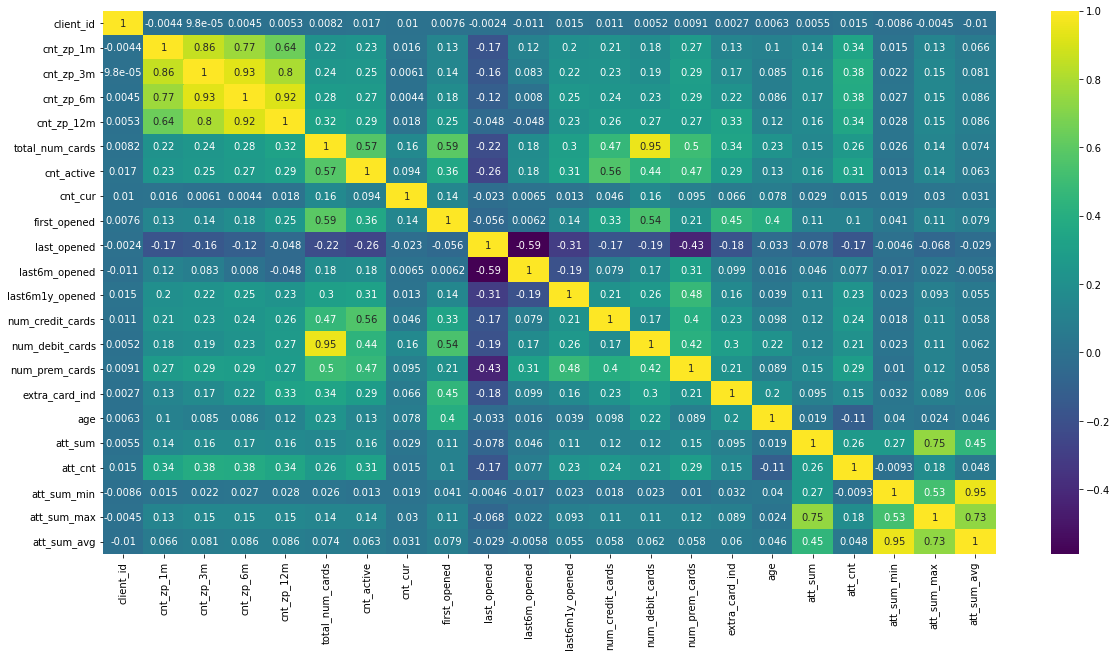

In [184]:
plt.figure(figsize=(20,10))
sns.heatmap(data=agg_15.corr(), annot=True, cmap='viridis')

В качестве аудитории, для которой сущесвует первостепенная необходимость показа рекламы продукта "Потребительский кредит", выбраны активные пользователи банка, удовлетворяющие при этом условиям кредитования.
Обязательным условием является возвраст аудитории. Согласно положению Газпромбанка возвраст заемщика должен быть от 20 до 69 и опыт работы на текущем месте более 3 месяцев.
Также условиями активности клиента является количество транзакций за последний месяц больше 5 и их общая сумма более 10000 рублей.
На основе этих данных введем новую метрику и проиндексируем данные.


In [185]:
agg_zero_metric=agg_15
agg_zero_metric.insert(1,'metric',0,False)
agg_zero_metric.head()

,client_id,metric,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,0,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,2.0,2.0,0.0,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,0,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,9131,0,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,3.0,1.0,0.0,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
4,3604,0,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,2.0,1.0,0.0,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000
5,5216,0,2020-10-01 00:00:00,1.0,4.0,9.0,25.0,5.0,4.0,0.0,...,0.0,5.0,3.0,1.0,32.373656,13264.00,18.0,572.00,10918.00,1612.358973


In [186]:
agg_zero_metric=agg_zero_metric.reset_index(drop=True)
agg_zero_metric.head()

,client_id,metric,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,0,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,2.0,2.0,0.0,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,0,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,9131,0,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,3.0,1.0,0.0,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
3,3604,0,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,2.0,1.0,0.0,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000
4,5216,0,2020-10-01 00:00:00,1.0,4.0,9.0,25.0,5.0,4.0,0.0,...,0.0,5.0,3.0,1.0,32.373656,13264.00,18.0,572.00,10918.00,1612.358973


In [187]:
for k in range(agg_zero_metric.shape[0]-1):
    if ((agg_zero_metric.loc[k,'age']>20) &  (agg_zero_metric.loc[k,'age']<69)) & (((agg_zero_metric.loc[k,'att_sum']>15000) & (agg_zero_metric.loc[k,'att_cnt']>5))| ((agg_zero_metric.loc[k,'cnt_zp_1m']>0) & (agg_zero_metric.loc[k,'cnt_zp_1m']< agg_zero_metric.loc[k,'cnt_zp_3m']) )):
    #if ((agg_zero_metric.loc[k,'age']>20) &  (agg_zero_metric.loc[k,'age']<69)) & (((agg_zero_metric.loc[k,'att_sum']>15000) & (agg_zero_metric.loc[k,'att_cnt']>5)) & ((agg_zero_metric.loc[k,'cnt_zp_1m']>0) & (agg_zero_metric.loc[k,'cnt_zp_1m']< agg_zero_metric.loc[k,'cnt_zp_3m']) )):
        agg_zero_metric.loc[k,'metric']=1
        

<AxesSubplot:>

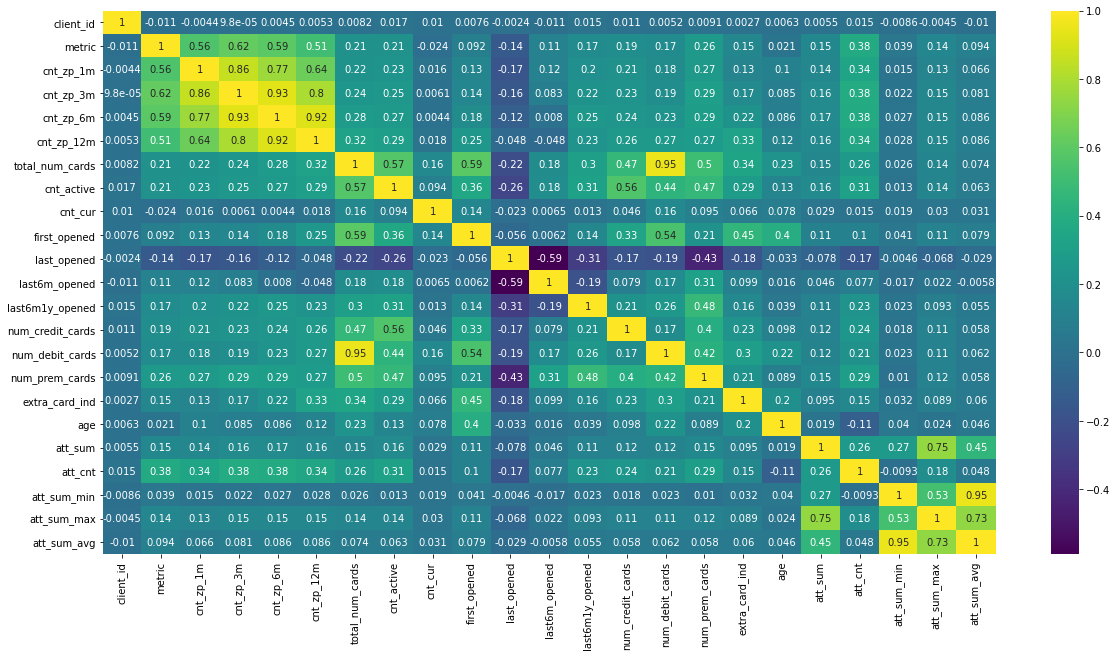

In [188]:
plt.figure(figsize=(20,10))
sns.heatmap(data=agg_zero_metric.corr(), annot=True, cmap='viridis')

In [189]:
agg_zero_metric.head()

,client_id,metric,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,101,1,2020-10-01 00:00:00,9.0,17.0,17.0,17.0,2.0,2.0,0.0,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,3862,0,2020-10-01 00:00:00,0.0,0.0,0.0,11.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,9131,1,2020-10-01 00:00:00,2.0,6.0,12.0,24.0,3.0,1.0,0.0,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
3,3604,1,2020-10-01 00:00:00,3.0,3.0,3.0,3.0,2.0,1.0,0.0,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000
4,5216,1,2020-10-01 00:00:00,1.0,4.0,9.0,25.0,5.0,4.0,0.0,...,0.0,5.0,3.0,1.0,32.373656,13264.00,18.0,572.00,10918.00,1612.358973


In [190]:
print(agg_zero_metric[agg_zero_metric['metric']==1].count()/agg_zero_metric.shape[0])

client_id           0.772542
metric              0.772542
report_date         0.772542
cnt_zp_1m           0.772542
cnt_zp_3m           0.772542
cnt_zp_6m           0.772542
cnt_zp_12m          0.772542
total_num_cards     0.772542
cnt_active          0.772542
cnt_cur             0.772542
first_opened        0.772542
last_opened         0.772542
last6m_opened       0.772542
last6m1y_opened     0.772542
num_credit_cards    0.772542
num_debit_cards     0.772542
num_prem_cards      0.772542
extra_card_ind      0.772542
age                 0.772542
att_sum             0.772542
att_cnt             0.772542
att_sum_min         0.772542
att_sum_max         0.772542
att_sum_avg         0.772542
dtype: float64


In [191]:
agg_fin=agg_zero_metric.drop(['client_id', 'report_date'], axis=1)
agg_fin.head()

,metric,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,last_opened,...,num_credit_cards,num_debit_cards,num_prem_cards,extra_card_ind,age,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,1,9.0,17.0,17.0,17.0,2.0,2.0,0.0,4.226,2.774,...,1.0,1.0,2.0,0.0,42.354839,27510.68,30.0,1346.50,10410.00,5014.565127
1,0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,67.387,28.452,...,0.0,1.0,0.0,1.0,24.680108,0.00,0.0,0.00,0.00,0.000000
2,1,2.0,6.0,12.0,24.0,3.0,1.0,0.0,58.258,0.548,...,1.0,2.0,2.0,1.0,33.956989,48000.00,6.0,100.00,13000.00,8000.000000
3,1,3.0,3.0,3.0,3.0,2.0,1.0,0.0,2.161,2.161,...,0.0,2.0,2.0,0.0,30.301075,90081.89,11.0,242.89,50147.89,9077.390000
4,1,1.0,4.0,9.0,25.0,5.0,4.0,0.0,53.226,0.452,...,0.0,5.0,3.0,1.0,32.373656,13264.00,18.0,572.00,10918.00,1612.358973


In [192]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
agg_fin=agg_fin.drop(['cnt_zp_1m','cnt_zp_3m','cnt_zp_6m','cnt_zp_12m','att_sum','att_cnt','att_sum_min','att_sum_max','num_credit_cards','num_debit_cards','last6m_opened',
                      'num_prem_cards'],axis=1)
#agg_fin['cnt_zp_1m']=scaler.fit_transform(agg_fin['cnt_zp_1m'].values.reshape(-1 ,1))
#agg_fin['cnt_zp_3m']=scaler.fit_transform(agg_fin['cnt_zp_3m'].values.reshape(-1 ,1))
#agg_fin['cnt_zp_6m']=scaler.fit_transform(agg_fin['cnt_zp_6m'].values.reshape(-1 ,1))
#agg_fin['cnt_zp_12m']=scaler.fit_transform(agg_fin['cnt_zp_12m'].values.reshape(-1 ,1))
# agg_fin['total_num_cards']=scaler.fit_transform(agg_fin['total_num_cards'].values.reshape(-1 ,1))
# agg_fin['cnt_active']=scaler.fit_transform(agg_fin['cnt_active'].values.reshape(-1 ,1))
# agg_fin['first_opened']=scaler.fit_transform(agg_fin['first_opened'].values.reshape(-1 ,1))
# agg_fin['last_opened']=scaler.fit_transform(agg_fin['last_opened'].values.reshape(-1 ,1))
# #agg_fin['num_credit_cards']=scaler.fit_transform(agg_fin['num_credit_cards'].values.reshape(-1 ,1))
# #agg_fin['num_debit_cards']=scaler.fit_transform(agg_fin['num_debit_cards'].values.reshape(-1 ,1))
# #agg_fin['num_prem_cards']=scaler.fit_transform(agg_fin['num_prem_cards'].values.reshape(-1 ,1))
# agg_fin['age']=scaler.fit_transform(agg_fin['age'].values.reshape(-1 ,1))
# #agg_fin['att_sum']=scaler.fit_transform(agg_fin['att_sum'].values.reshape(-1 ,1))
# #agg_fin['att_cnt']=scaler.fit_transform(agg_fin['att_cnt'].values.reshape(-1 ,1))
# #agg_fin['att_sum_min']=scaler.fit_transform(agg_fin['att_sum_min'].values.reshape(-1 ,1))
# #agg_fin['att_sum_max']=scaler.fit_transform(agg_fin['att_sum_max'].values.reshape(-1 ,1))
# agg_fin['att_sum_avg']=scaler.fit_transform(agg_fin['att_sum_avg'].values.reshape(-1 ,1))
# #agg_fin['last6m_opened']=scaler.fit_transform(agg_fin['last6m_opened'].values.reshape(-1 ,1))
# agg_fin['last6m1y_opened']=scaler.fit_transform(agg_fin['last6m1y_opened'].values.reshape(-1 ,1))
agg_fin.head()

,metric,total_num_cards,cnt_active,cnt_cur,first_opened,last_opened,last6m1y_opened,extra_card_ind,age,att_sum_avg
0,1,2.0,2.0,0.0,4.226,2.774,0.0,0.0,42.354839,5014.565127
1,0,1.0,1.0,0.0,67.387,28.452,0.0,1.0,24.680108,0.000000
2,1,3.0,1.0,0.0,58.258,0.548,1.0,1.0,33.956989,8000.000000
3,1,2.0,1.0,0.0,2.161,2.161,0.0,0.0,30.301075,9077.390000
4,1,5.0,4.0,0.0,53.226,0.452,1.0,1.0,32.373656,1612.358973


<AxesSubplot:>

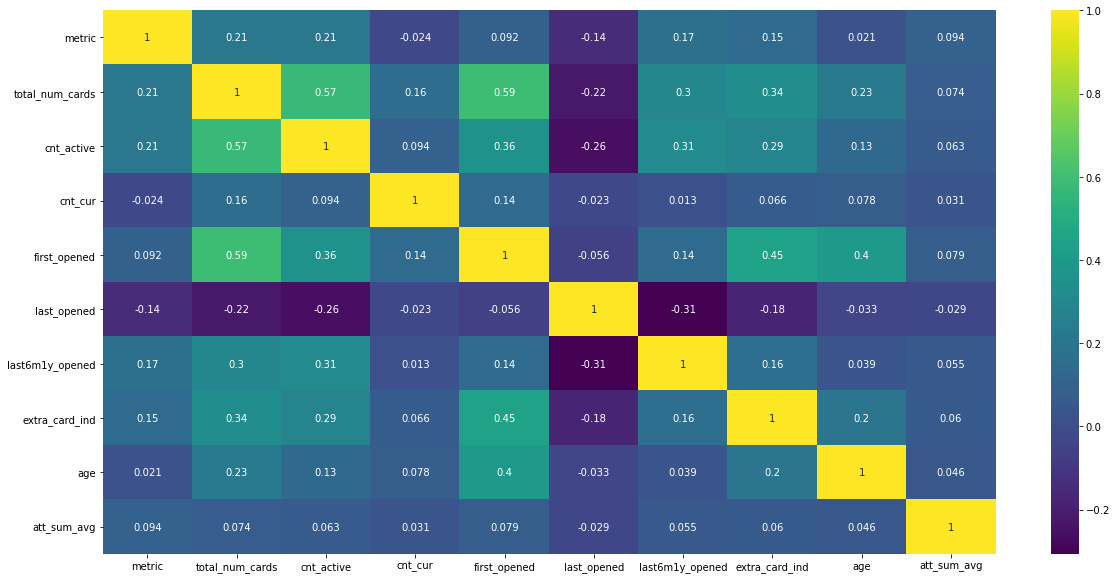

In [193]:
plt.figure(figsize=(20,10))
sns.heatmap(data=agg_fin.corr(), annot=True, cmap='viridis')

In [194]:
y=agg_fin['metric']
agg_fin=agg_fin.drop('metric',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(agg_fin,y,stratify=y, test_size = 0.8, random_state = 101)


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [195]:
X_train.head()

,total_num_cards,cnt_active,cnt_cur,first_opened,last_opened,last6m1y_opened,extra_card_ind,age,att_sum_avg
1669,2.0,1.0,0.0,12.290,11.484,1.0,0.0,46.451613,6802.915714
1910,1.0,1.0,0.0,21.355,21.355,0.0,0.0,60.852151,15096.321077
7264,5.0,2.0,0.0,105.839,6.645,2.0,1.0,46.655914,27384.166248
1676,1.0,1.0,0.0,27.419,27.419,0.0,0.0,23.559140,3109.000000
3033,7.0,4.0,0.0,112.032,2.355,1.0,1.0,43.693548,29001.319785


In [196]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(RFCCV*100)

[[1182  382]
 [ 191 5121]]
90.86665306677546


In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(GBKCV*100)

[[1187  377]
 [ 203 5109]]
90.80817353461173


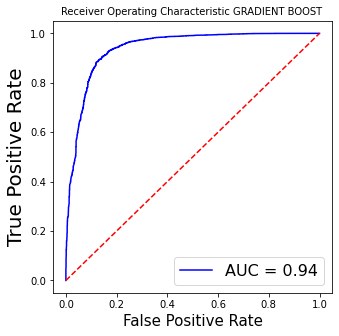

In [198]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [199]:
from sklearn.metrics import classification_report
print('GradientBoostingClassifier Reports\n',classification_report(y_test, gbkpred))

GradientBoostingClassifier Reports
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1564
           1       0.93      0.96      0.95      5312

    accuracy                           0.92      6876
   macro avg       0.89      0.86      0.88      6876
weighted avg       0.91      0.92      0.91      6876



In [200]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=rfc, param_grid={'n_estimators': (100,110), 'criterion': ['gini'],
                        'max_depth': (10,20)}, cv = cv)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 110}


In [201]:
from sklearn.ensemble import RandomForestClassifier
best_rfc = RandomForestClassifier(n_estimators = 110, criterion = 'gini',max_depth= 10)
best_rfc.fit(X_train, y_train)
rfcpred = best_rfc.predict(X_test)

[[1183  381]
 [ 184 5128]]
0.9115701074391407


Confusion matrix, without normalization
[[1183  381]
 [ 184 5128]]
Normalized confusion matrix
[[0.75639386 0.24360614]
 [0.03463855 0.96536145]]


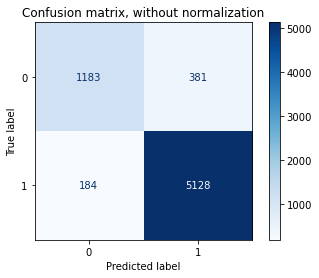

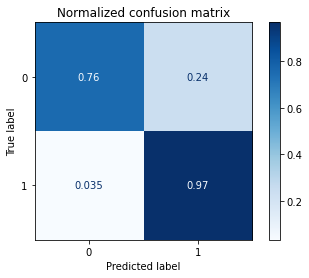

Accuracy:
 0.9115701074391407


In [202]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_rfc, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print('Accuracy:\n',RFCCV)